# Isolation Forest

## Load Data

In [2]:
## Libraries
# lightkurve
#import lightkurve as lk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm
# import warnings
# import pickle
from sklearn.ensemble import IsolationForest
# from sklearn.preprocessing import StandardScaler

In [3]:
##("../0.Data/031381302_imputed.csv")

## Data
df = pd.read_csv("../0.Data/031381302_imputed.csv", index_col = 0)
df.sort_index(inplace=True)

# Check
print(df.shape)
print(df.head())

## Time Series of interest
lightcurve = df.loc[:, ["pdcsap_clean"]]

# Check
print(lightcurve.shape); lightcurve.info(); lightcurve.head()

(18856, 4)
             pdcsap_flux  pdcsap_clean        trend  seasonal
1437.978646          NaN      1.423914  1564.788866 -1.753096
1437.980034          NaN     -1.225973  1564.784308  0.901349
1437.981423          NaN      1.204118  1564.779761 -1.524195
1437.982812          NaN      2.528983  1564.775225 -2.844523
1437.984201          NaN      0.485369  1564.770699 -0.796384
(18856, 1)
<class 'pandas.core.frame.DataFrame'>
Float64Index: 18856 entries, 1437.978645522663 to 1464.2854684532865
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pdcsap_clean  18856 non-null  float64
dtypes: float64(1)
memory usage: 294.6 KB


,pdcsap_clean
1437.978646,1.423914
1437.980034,-1.225973
1437.981423,1.204118
1437.982812,2.528983
1437.984201,0.485369


## Model Setup

In [4]:
## Hyperparameters
n_estimators = 100 # Number of trees
contamination = 0.001 # Expected proportion of anomalies
sample_size = 256 # Number of samples used to train each tree

## Train Model

In [5]:
## Isolation Forest
model = IsolationForest(n_estimators = n_estimators, contamination = contamination, max_samples = sample_size)
#contamination = "auto", random_state = 42)
# random_state: for reproducibility.
model.fit(lightcurve)

## Predict anomalies
anomalies = model.predict(lightcurve)
scores = model.decision_function(lightcurve)

## Save
lightcurve["anomaly"] = anomalies
lightcurve["anomaly"] = lightcurve["anomaly"].map({1: 0, -1: 1})
lightcurve["anomaly_score"] = scores

C:\Users\alexd\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [6]:
# Check
print(lightcurve["anomaly_score"].describe())

lightcurve.head()

count    18856.000000
mean         0.327131
std          0.074785
min         -0.026409
25%          0.316269
50%          0.360051
75%          0.371604
max          0.394880
Name: anomaly_score, dtype: float64


,pdcsap_clean,anomaly,anomaly_score
1437.978646,1.423914,0,0.371549
1437.980034,-1.225973,0,0.368650
1437.981423,1.204118,0,0.372564
1437.982812,2.528983,0,0.367135
1437.984201,0.485369,0,0.384673


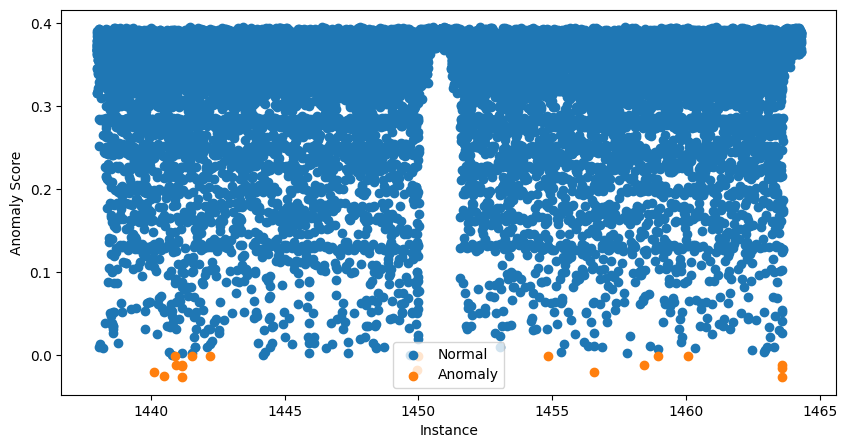

In [7]:
## Plot - Anomaly Scores
plt.figure(figsize=(10, 5))

# Plot normal instances
normal = lightcurve[lightcurve['anomaly'] == 0]
plt.scatter(normal.index, normal['anomaly_score'], label='Normal')

# Plot anomalies
anomalies = lightcurve[lightcurve['anomaly'] == 1]
plt.scatter(anomalies.index, anomalies['anomaly_score'], label='Anomaly')
plt.xlabel("Instance")
plt.ylabel("Anomaly Score")
plt.legend()
plt.show()

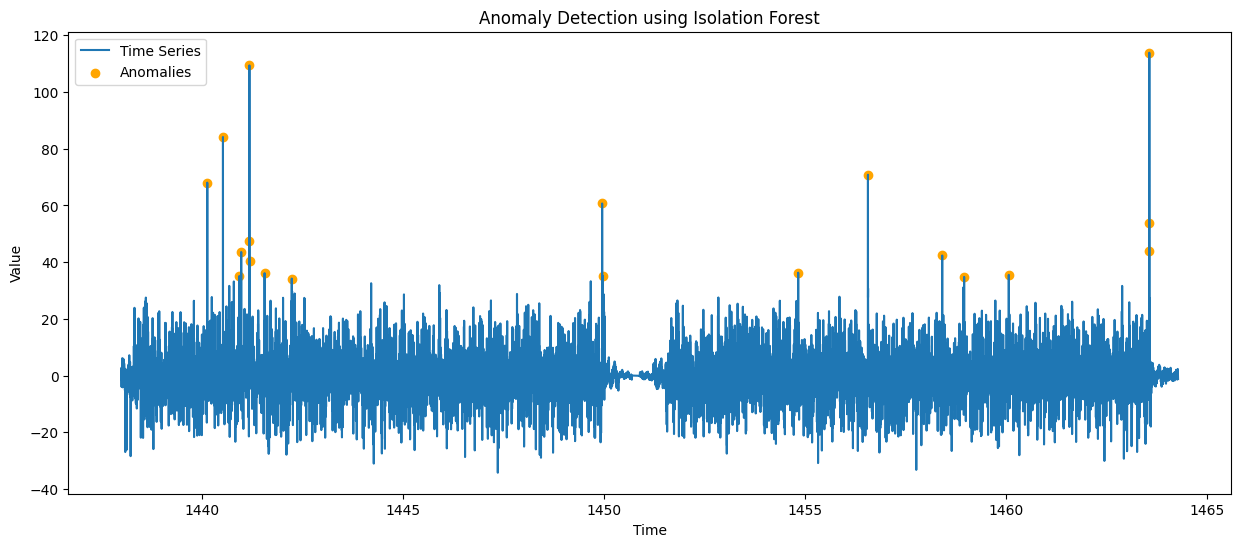

In [8]:
## Plot - Highlight anomalies
plt.figure(figsize=(15, 6))
plt.plot(lightcurve["pdcsap_clean"], label='Time Series')
plt.scatter(anomalies.index, anomalies['pdcsap_clean'], label='Anomalies', color = "orange")
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

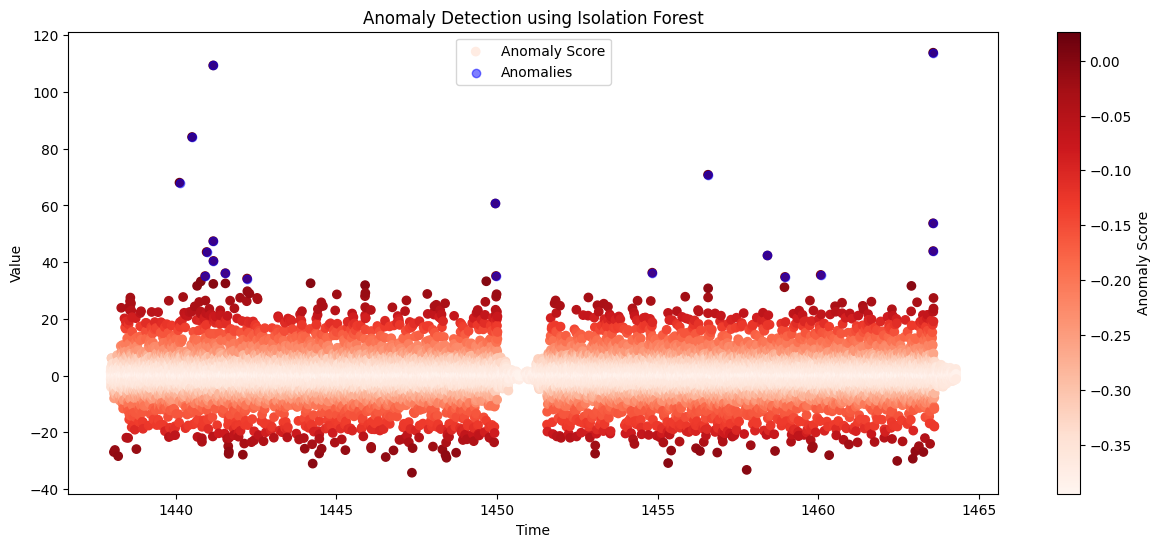

In [9]:
## Plot - Anomaly scores
plt.figure(figsize=(15, 6))
plt.scatter(lightcurve.index, lightcurve["pdcsap_clean"], c = -lightcurve["anomaly_score"], cmap = "Reds", label='Anomaly Score')
plt.colorbar().set_label("Anomaly Score")
plt.scatter(anomalies.index, anomalies['pdcsap_clean'], label='Anomalies', color = "blue", alpha = 0.5)
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

## Exploration

In [53]:
np.where(lightcurve["anomaly"] == 1)[0]

lightcurve.iloc[5]#["anomaly"]

lightcurve.head()

lightcurve.loc[lightcurve.index.min(), "anomaly"]

np.where(lightcurve.index == lightcurve.index.min())[0][0]

0

In [ ]:
## Anomaly Score Percentile Intervals
# Ideas:
# - Make threshold scale with distance from nearest anomaly
def map_flare(ind, threshold = 0.9):
    ## If not anomaly, break.
    if lightcurve.loc[ind, "anomaly"] == 0:
        return
    
    ## Setup
    flare = [ind]
    num_ind = np.where(lightcurve.index == ind)[0][0]
    cont, i = True, 1

    ## Iterate
    while cont:
        ## Backward
        if lightcurve.
        ## Forward

    return flare

## Setup
anomaly_inds = np.where(lightcurve["anomaly"] == 1)[0]
    #lightcurve.iloc[np.where(lightcurve["anomaly"] == 1)[0]].index
print(anomaly_inds)

## Iterate
for id in anomaly_inds:
    map_flare(id)

# lightcurve["flare"] = lightcurve.loc[anomaly_inds].index.apply(map_flare, axis = 'index')

# Check
# print(lightcurve.iloc[0][0])
# bonk = lightcurve["anomaly"].apply(lambda x: x + 1)
# bonk.head()

Float64Index([1440.1202999939856, 1440.5105759300711, 1440.9161296028956,
               1440.964740489865,  1441.168906217945, 1441.1702951004725,
              1441.1758506305555,   1441.54668226809, 1442.2230680790349,
              1449.9494163001405, 1449.9674717150897, 1454.8299477741843,
              1456.5660539464695,  1458.414659711411, 1458.9604914076117,
              1460.0715990399267, 1463.5688067536785, 1463.5701956340904,
              1463.5715845144723],
             dtype='float64')


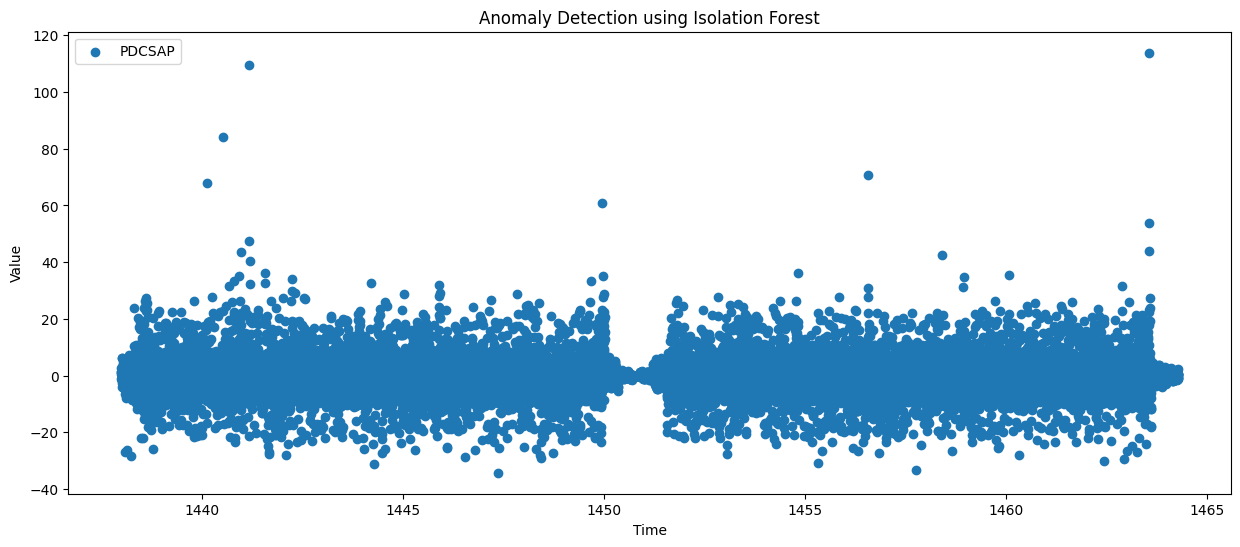

In [ ]:
## Plot
plt.figure(figsize=(15, 6))
plt.scatter(lightcurve.index, lightcurve["pdcsap_clean"], label = "PDCSAP")
# plt.scatter(anomalies.index, anomalies['pdcsap_clean'], label='Anomalies', color = "orange")
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()